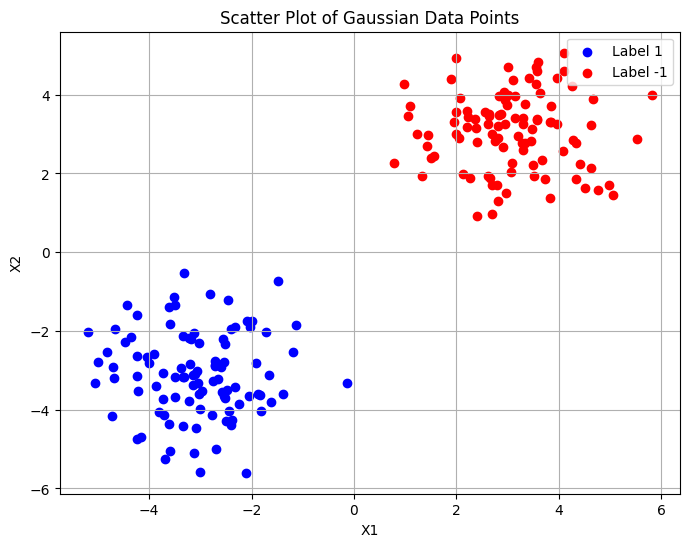

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.randn(200, 2)

X[0:100, :] -= 3
X[100:200, :] += 3

Y = np.ones((200, 1))
Y[100:200, :] = -1

plt.figure(figsize=(8, 6))
plt.scatter(X[0:100, 0], X[0:100, 1], color='blue', label='Label 1')
plt.scatter(X[100:200, 0], X[100:200, 1], color='red', label='Label -1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Gaussian Data Points')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
def svm_gradient(w, X, Y):
    """
    Compute the gradient of the SVM loss function
    """
    n = len(X)
    gradient = w.copy()

    for i in range(n):
        if 1 - Y[i] * np.dot(X[i], w) > 0:
            gradient -= Y[i] * X[i]

    return gradient


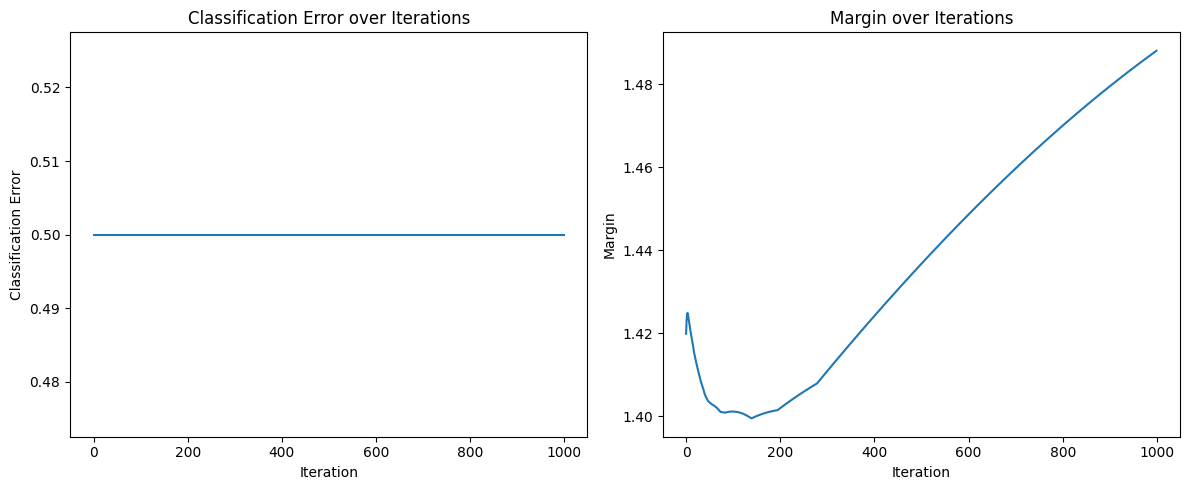

In [3]:
def svm_gradient_descent(X, Y, w_init, step_size, iterations):
    """
    Perform gradient descent for the SVM loss function
    """
    w = w_init.copy()
    n = len(X)
    classification_errors = []
    margins = []

    for _ in range(iterations):
        # Calculate the gradient
        gradient = w.copy()
        for i in range(n):
            if 1 - Y[i] * np.dot(X[i], w) > 0:
                gradient -= Y[i] * X[i]

        w -= step_size * gradient

        predictions = np.sign(np.dot(X, w))
        classification_error = np.mean(predictions != np.sign(Y))
        classification_errors.append(classification_error)

        margin = 2 / np.linalg.norm(w)
        margins.append(margin)

    return classification_errors, margins

step_size = 1e-4
iterations = 1000
w_init = np.array([-1, 1], dtype=np.float64)

classification_errors, margins = svm_gradient_descent(X, Y, w_init, step_size, iterations)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(classification_errors)
plt.xlabel('Iteration')
plt.ylabel('Classification Error')
plt.title('Classification Error over Iterations')

plt.subplot(1, 2, 2)
plt.plot(margins)
plt.xlabel('Iteration')
plt.ylabel('Margin')
plt.title('Margin over Iterations')

plt.tight_layout()
plt.show()


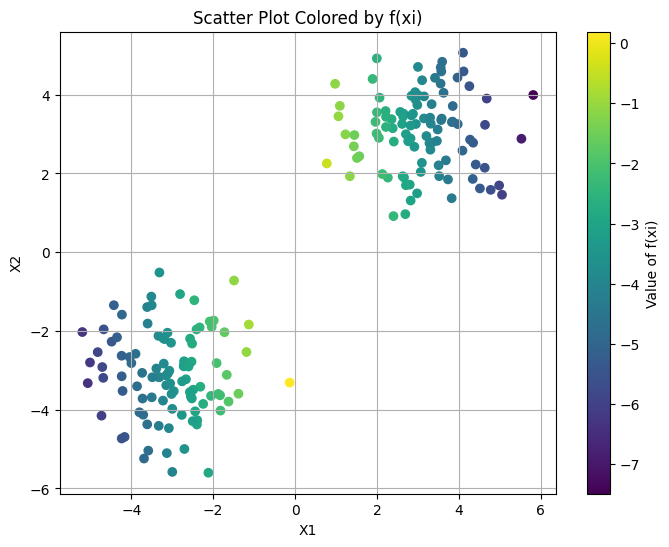

In [4]:
_, _ = svm_gradient_descent(X, Y, w_init, step_size, iterations)

final_w = w_init.copy()
for _ in range(iterations):
    gradient = final_w.copy()
    for i in range(len(X)):
        if 1 - Y[i] * np.dot(X[i], final_w) > 0:
            gradient -= Y[i] * X[i]
    final_w -= step_size * gradient

f_values = 1 - Y.flatten() * np.dot(X, final_w)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=f_values, cmap='viridis')
plt.colorbar(scatter, label='Value of f(xi)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot Colored by f(xi)')
plt.grid(True)
plt.show()
